<a href="https://colab.research.google.com/github/detayans/Project-Clustering/blob/main/ProjectClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#Reading the Dataset

In [2]:
data = pd.read_csv("/content/employee-compensation.csv")

In [3]:
data.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [4]:
data.shape

(366391, 22)

#Working On missing values and Drop columns

In [5]:
miss_val = data.isna().sum()
miss_val

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              0
Department                   0
Union Code                 136
Union                      136
Job Family                   0
Job                          1
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   1
Health and Dental            1
Other Benefits               1
Total Benefits               1
Total Compensation           1
dtype: int64

#Drop columns

In [6]:
data = data.dropna()
data

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.00,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.00,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.00,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.00,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.00,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366385,4,2100,2110,Fiscal,2014,Community Health,DPH,DPH Public Health,790.0,"SEIU - Miscellaneous, Local 1021",Hospital Administration,Medical Records Clerk,45066,60827.12,179.03,3740.92,64747.07,13298.01,12512.55,5212.09,31022.65,95769.72
366386,4,2100,2110,Fiscal,2014,Community Health,DPH,DPH Public Health,790.0,"SEIU - Miscellaneous, Local 1021",Hospital Administration,Medical Records Clerk,45454,60827.11,12321.40,2576.70,75725.21,13293.72,12512.55,5963.20,31769.47,107494.68
366387,4,2100,2110,Fiscal,2014,Community Health,DPH,DPH Public Health,790.0,"SEIU - Miscellaneous, Local 1021",Hospital Administration,Medical Records Clerk,4600,60025.98,0.00,1288.83,61314.81,13029.67,12349.49,4817.06,30196.22,91511.03
366388,4,2100,2110,Fiscal,2014,Community Health,DPH,DPH Public Health,790.0,"SEIU - Miscellaneous, Local 1021",Hospital Administration,Medical Records Clerk,4691,56265.92,1974.90,250.00,58490.82,11995.90,12512.55,4707.46,29215.91,87706.73


In [7]:
miss_val = data.isna().sum()
miss_val

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

In [8]:
data.columns

Index(['Organization Group Code', 'Job Family Code', 'Job Code', 'Year Type',
       'Year', 'Organization Group', 'Department Code', 'Department',
       'Union Code', 'Union', 'Job Family', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [9]:
data = data.drop(['Year Type','Organization Group', 
       'Union', 'Job Family', 'Job', 
       'Salaries', 'Overtime', 'Other Salaries', 'Total Benefits'], axis = 1)


In [10]:
data.head()

,Organization Group Code,Job Family Code,Job Code,Year,Department Code,Department,Union Code,Employee Identifier,Total Salary,Retirement,Health and Dental,Other Benefits,Total Compensation
0,1,1000,1021,2013,ADP,ADP Adult Probation,21.0,37730,57534.65,11253.16,11961.34,4532.63,85281.78
1,1,1000,1023,2013,ADP,ADP Adult Probation,21.0,26574,57678.50,10284.88,7176.80,4755.14,79895.32
2,1,1000,1031,2013,ADP,ADP Adult Probation,21.0,8148,63532.93,12495.83,12918.24,4702.71,93649.71
3,1,1000,1054,2013,ADP,ADP Adult Probation,21.0,27436,94215.92,19644.45,12918.24,7458.76,134237.37
4,1,1000,1062,2013,ADP,ADP Adult Probation,21.0,37730,5084.00,1083.90,956.91,387.50,7512.31


In [11]:
data = data.drop(['Department Code','Department'], axis = 1)
data


,Organization Group Code,Job Family Code,Job Code,Year,Union Code,Employee Identifier,Total Salary,Retirement,Health and Dental,Other Benefits,Total Compensation
0,1,1000,1021,2013,21.0,37730,57534.65,11253.16,11961.34,4532.63,85281.78
1,1,1000,1023,2013,21.0,26574,57678.50,10284.88,7176.80,4755.14,79895.32
2,1,1000,1031,2013,21.0,8148,63532.93,12495.83,12918.24,4702.71,93649.71
3,1,1000,1054,2013,21.0,27436,94215.92,19644.45,12918.24,7458.76,134237.37
4,1,1000,1062,2013,21.0,37730,5084.00,1083.90,956.91,387.50,7512.31
...,...,...,...,...,...,...,...,...,...,...,...
366385,4,2100,2110,2014,790.0,45066,64747.07,13298.01,12512.55,5212.09,95769.72
366386,4,2100,2110,2014,790.0,45454,75725.21,13293.72,12512.55,5963.20,107494.68
366387,4,2100,2110,2014,790.0,4600,61314.81,13029.67,12349.49,4817.06,91511.03
366388,4,2100,2110,2014,790.0,4691,58490.82,11995.90,12512.55,4707.46,87706.73


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366253 entries, 0 to 366389
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  366253 non-null  int64  
 1   Job Family Code          366253 non-null  object 
 2   Job Code                 366253 non-null  object 
 3   Year                     366253 non-null  int64  
 4   Union Code               366253 non-null  float64
 5   Employee Identifier      366253 non-null  int64  
 6   Total Salary             366253 non-null  float64
 7   Retirement               366253 non-null  float64
 8   Health and Dental        366253 non-null  float64
 9   Other Benefits           366253 non-null  float64
 10  Total Compensation       366253 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 33.5+ MB


#Correlation of output with input


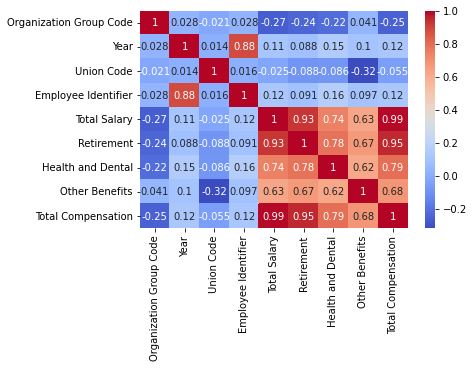

In [13]:
data_corr = data.corr()
sns.heatmap(data_corr, annot=True, cmap='coolwarm')

In [14]:
data_corr

,Organization Group Code,Year,Union Code,Employee Identifier,Total Salary,Retirement,Health and Dental,Other Benefits,Total Compensation
Organization Group Code,1.000000,0.027685,-0.021290,0.027505,-0.266230,-0.238631,-0.218347,0.040848,-0.254098
Year,0.027685,1.000000,0.014336,0.884140,0.113321,0.087684,0.146631,0.100902,0.116618
Union Code,-0.021290,0.014336,1.000000,0.016347,-0.024964,-0.088398,-0.086322,-0.318268,-0.055062
Employee Identifier,0.027505,0.884140,0.016347,1.000000,0.120924,0.090664,0.164100,0.096925,0.124071
Total Salary,-0.266230,0.113321,-0.024964,0.120924,1.000000,0.929429,0.743056,0.633713,0.994245
Retirement,-0.238631,0.087684,-0.088398,0.090664,0.929429,1.000000,0.784007,0.670383,0.954646
Health and Dental,-0.218347,0.146631,-0.086322,0.164100,0.743056,0.784007,1.000000,0.618967,0.794615
Other Benefits,0.040848,0.100902,-0.318268,0.096925,0.633713,0.670383,0.618967,1.000000,0.684354
Total Compensation,-0.254098,0.116618,-0.055062,0.124071,0.994245,0.954646,0.794615,0.684354,1.000000


#Numerical Data

In [15]:
data['Job Code']=pd.to_numeric(data['Job Code'],errors='coerce')
data['Job Family Code']=pd.to_numeric(data['Job Family Code'],errors='coerce')

In [16]:
data.head()

,Organization Group Code,Job Family Code,Job Code,Year,Union Code,Employee Identifier,Total Salary,Retirement,Health and Dental,Other Benefits,Total Compensation
0,1,1000.0,1021.0,2013,21.0,37730,57534.65,11253.16,11961.34,4532.63,85281.78
1,1,1000.0,1023.0,2013,21.0,26574,57678.50,10284.88,7176.80,4755.14,79895.32
2,1,1000.0,1031.0,2013,21.0,8148,63532.93,12495.83,12918.24,4702.71,93649.71
3,1,1000.0,1054.0,2013,21.0,27436,94215.92,19644.45,12918.24,7458.76,134237.37
4,1,1000.0,1062.0,2013,21.0,37730,5084.00,1083.90,956.91,387.50,7512.31


In [17]:
data=data.dropna()

In [18]:
from sklearn.cluster import KMeans

In [19]:
model = KMeans(n_clusters =3)

In [20]:
model.fit(data)

KMeans(n_clusters=3)

In [21]:
print(model.cluster_centers_)

[[3.16988343e+00 4.84034494e+03 4.90141309e+03 2.01754530e+03
  4.35106650e+02 3.73838888e+07 7.90643233e+04 1.37481929e+04
  1.08365142e+04 5.71461706e+03 1.09363647e+05]
 [3.11268595e+00 4.92996312e+03 4.97597639e+03 2.01422381e+03
  4.18453393e+02 2.84778408e+04 6.69811277e+04 1.24160931e+04
  9.16985338e+03 5.04918573e+03 9.36162599e+04]
 [3.21082095e+00 4.76154758e+03 4.82835775e+03 2.01899046e+03
  4.36676916e+02 4.10499973e+07 8.69307024e+04 1.59028126e+04
  1.16534831e+04 6.24463758e+03 1.20731636e+05]]


#Distribution Plot

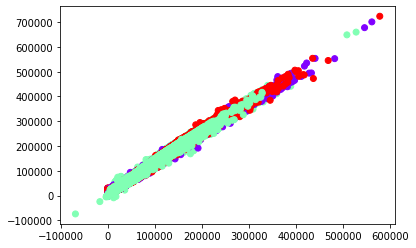

In [22]:
plt.scatter(data.iloc[:,6].values,data.iloc[:,-1].values, c=model.labels_, cmap="rainbow")
plt.show()

#Determining the Clusters Centers

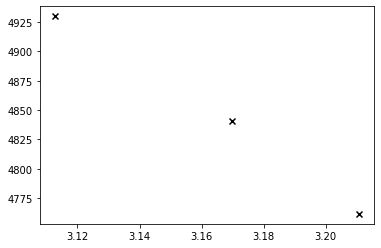

In [23]:
centers = np.array(model.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')

In [24]:
data.head()

,Organization Group Code,Job Family Code,Job Code,Year,Union Code,Employee Identifier,Total Salary,Retirement,Health and Dental,Other Benefits,Total Compensation
0,1,1000.0,1021.0,2013,21.0,37730,57534.65,11253.16,11961.34,4532.63,85281.78
1,1,1000.0,1023.0,2013,21.0,26574,57678.50,10284.88,7176.80,4755.14,79895.32
2,1,1000.0,1031.0,2013,21.0,8148,63532.93,12495.83,12918.24,4702.71,93649.71
3,1,1000.0,1054.0,2013,21.0,27436,94215.92,19644.45,12918.24,7458.76,134237.37
4,1,1000.0,1062.0,2013,21.0,37730,5084.00,1083.90,956.91,387.50,7512.31
